# Hexagonal puzzle



In [1]:
from main import Hex, draw_pieces, Piece, Board, translate, rotate, backtrack
import logging
import time
from PIL import Image
from pathlib import Path

# Configure logging
logging.basicConfig(
    filename='app.log',  # Log file path
    filemode='a',  # Append mode (use 'w' for overwrite mode)
    format='%(asctime)s - %(levelname)s - %(message)s',  # Include timestamp, log level and message
    level=logging.DEBUG  # Minimum level of messages to log
)

%load_ext autoreload
%autoreload 2

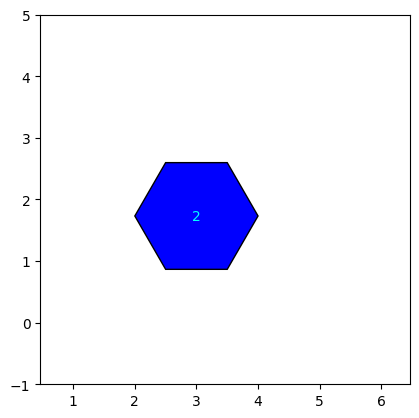

In [2]:
piece = Piece('example', 'blue', [(2,0)])
draw_pieces([piece])


# Pieces


In [3]:
bone = Piece('bone', 'blue', [(0,0), (0,1), (1,1), (2,1), (2,2)], angles=[0, 60, 120])
gun = Piece('gun', 'yellow', [(0,0), (1,0), (1,1), (2,1), (3,2)])
olympics = Piece('olympics', 'magenta', [(0,0), (1,0), (2,0), (1,1), (2,1)])
tent = Piece('tent', 'green', [(0,0), (1,0), (2,0), (0,1), (0,2)])
hook = Piece('hook', 'red', [(0,0), (1,0), (2,0), (0,1), (1,2)])
duck = Piece('duck', 'yellow', [(0,0), (1,0), (0,1), (1,1), (2,2)])

# 4 hex size
star = Piece('star', 'black', [(0,0), (1,0), (1,1), (2,1)], angles=[0, 60, 120])
snowflake = Piece('snowflake', 'blue', [(0,0), (1,1), (1,2), (2,1)], angles=[0, 60])
flag = Piece('flag', 'yellow', [(0,0), (1,0), (0,1), (0,2)])
post = Piece('post', 'magenta', [(0,0), (1,1), (1,2), (1,3)])
bowl = Piece('bowl', 'green', [(0,0), (0,1), (1,2), (2,2)])
pole = Piece('pole', 'red', [(0,0), (1,0), (2,0), (3,0)], angles=[0, 60, 120])
pipe = Piece('pipe', 'black', [(0,0), (0,1), (0, 2), (1,1)])
# 3 hex size
tiny = Piece('tiny', 'blue', [(0,0), (0,1), (1,1)], angles=[0, 60])


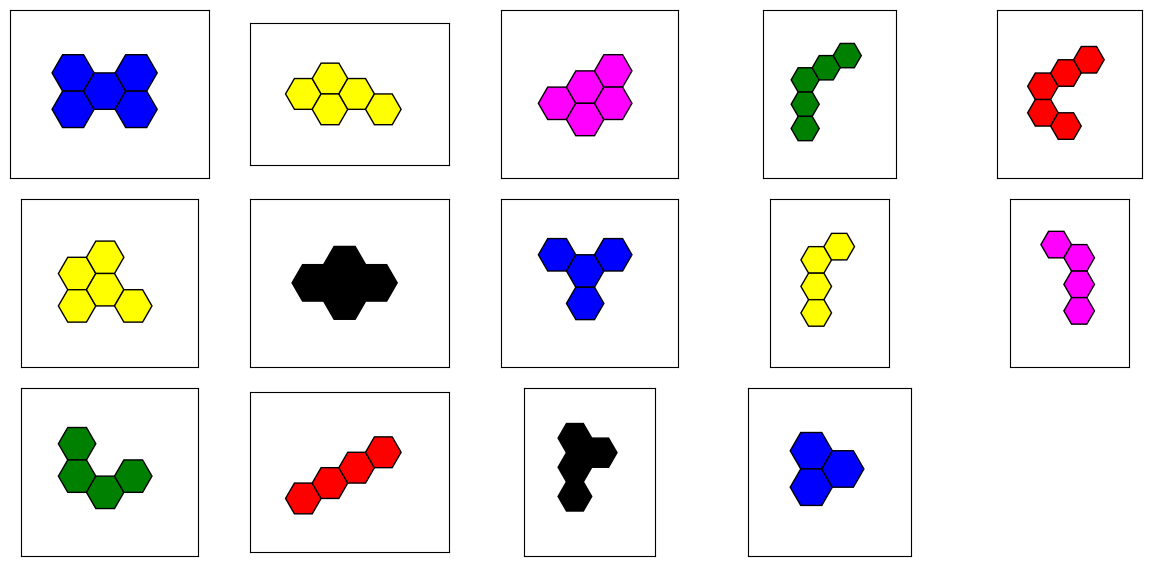

In [22]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(3, 5, figsize=(12, 6))

# Set the titles for each subplot
titles = ['bone', 'gun', 'olympics', 'tent', 'hook', 'duck', 'star', 'snowflake', 'flag', 'post', 'bowl', 'pole', 'pipe', 'tiny']

# Iterate over the pieces and draw them in the subplots
pieces = [bone, gun, olympics, tent, hook, duck, star, snowflake, flag, post, bowl, pole, pipe, tiny]
for i, piece in enumerate(pieces):
    ax = axs[i // 5, i % 5]  # Get the current subplot
    draw_pieces([piece], ax=ax, show_index=False)  # Draw the piece in the subplot
    # ax.set_title(titles[i])  # Set the title for the subplot
    ax.set_xticks([])
    # Remove the y-axis ticks and numbers
    ax.set_yticks([])

# Adjust the spacing between subplots
plt.tight_layout()

# # Remove the second subplot
fig.delaxes(axs[2, 4])
# fig.delaxes(axs[3, 3])
# Remove the x-axis ticks and numbers

plt.savefig('pieces.png')

# Show the combined image
plt.show()


# Translation and Rotation

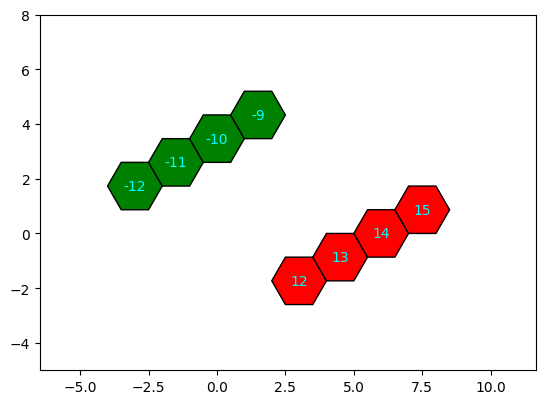

In [50]:
draw_pieces([
    translate(pole, (-2, -2), 'green'), 
    translate(pole, (2, 2))
    ])

And now add rotation (this is tricky to do directly in this skewed system so we'll do this: (x,y) -> (r,theta) -> rotation to delta -> (r,theta + dtheta) -> (x', y')):

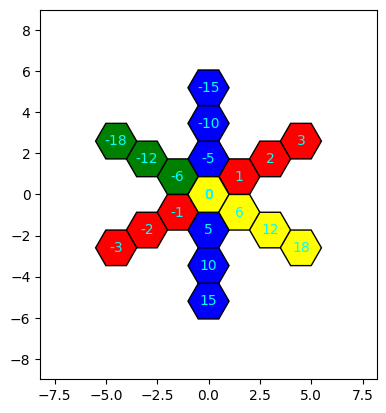

In [51]:
draw_pieces([
    pole, 
    rotate(pole, 60, 'blue'), 
    rotate(pole, 120, 'green'), 
    rotate(pole, 180, 'red'),
    rotate(pole, 240, 'blue'),
    rotate(pole, 300, 'yellow'),
])

# Put piece on the board

In [52]:
translate(pole, (2,0)).hexagons[1].coord

(3, 0)

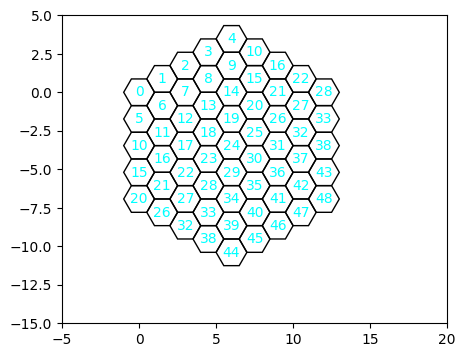

In [53]:
board = Board()
board.draw()

In [54]:
board.add_piece(bone)


True

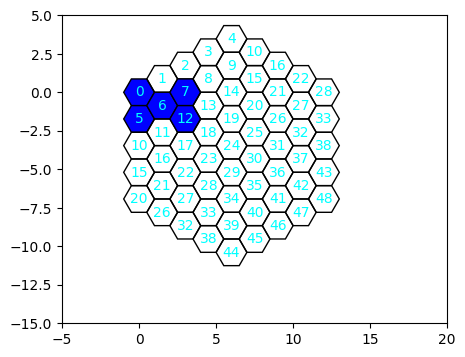

In [55]:
board.draw()

# Backtracking

So now we should implement backtracking. For each piece, and for each rotation, we try to place it on the board. We should also add a heuristics to not go random, in fact, we should always try to put piece next to the already assembled pieces. Let's also try large pieces first, then smaller.

Before we try any of this let's see clarify what solution is: a solution is that no pieces are left, and they all fit within the board.


Let's actually try smaller scope first, since I already know one solution. We'll give it 90% solved board and it will just need to find the last piece:

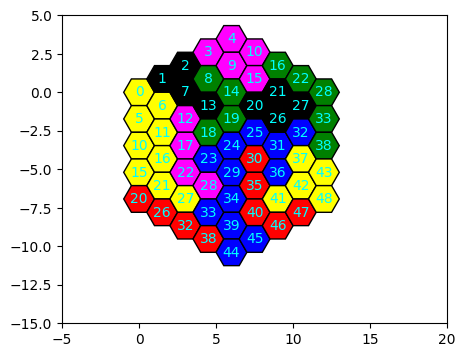

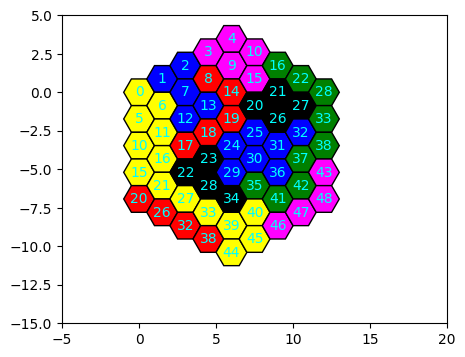

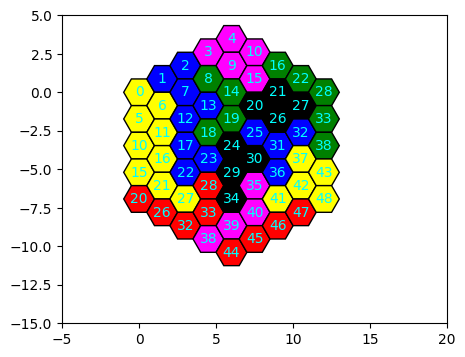

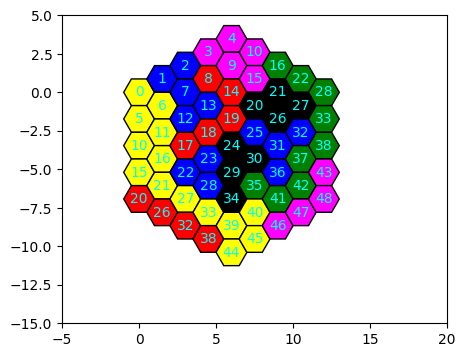

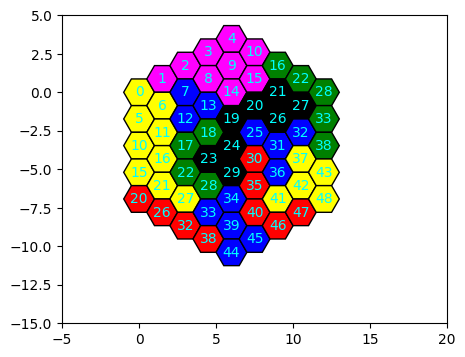

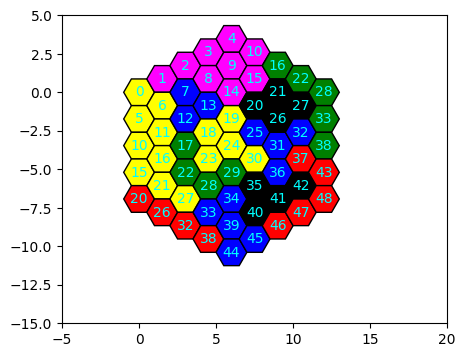

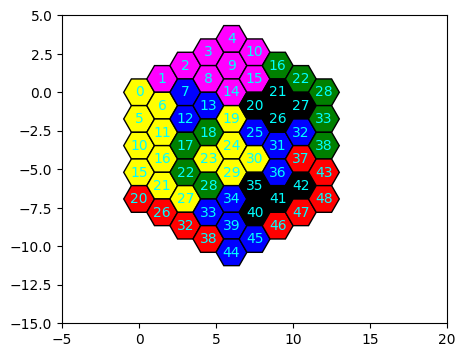

In [74]:
board = Board()
_ = board.add_piece(rotate(gun, 300))
_ = board.add_piece(translate(rotate(olympics, 120), (5,2)))
_ = board.add_piece(translate(rotate(tent, 240), (8,4)))
_ = board.add_piece(translate(rotate(star, 0), (5,3)))
_ = board.add_piece(translate(rotate(snowflake, 0), (5,4)))
_ = board.add_piece(translate(rotate(flag, 60), (0,3)))
# _ = board.add_piece(translate(rotate(post, 60), (1,0)))
# _ = board.add_piece(translate(rotate(bowl, 0), (2,3)))
# _ = board.add_piece(translate(rotate(tiny, 0), (2,1)))
# _ = board.add_piece(translate(rotate(duck, 0), (3,3)))
# _ = board.add_piece(translate(rotate(bone, 120), (4,8)))
# _ = board.add_piece(translate(rotate(pole, 300), (0,4)))

solutions = []
leftover = [post, tiny, bowl, duck, bone, pole, hook, pipe]
n = len(leftover)
tic = time.time()
backtrack(board, leftover, solutions)
toc = time.time()

logging.info(f'For {n} leftovers, found {len(solutions)} solutions in {toc-tic:.2f} seconds')

In [97]:

# Open the PNG image
for x in Path('solutions').glob('*.png'):
    image = Image.open(x)
    # Define the crop coordinates (left, upper, right, lower)
    crop_coords = (140, 50, 420, 310)
    # Crop the image
    cropped_image = image.crop(crop_coords)

    # Save the cropped image
    cropped_image.save(x.parent/(x.stem + '_cropped.png'))
    cropped_image.show()
